In [3]:
from fastapi import FastAPI, HTTPException, Depends, Security
from fastapi.security import HTTPBasic, HTTPBasicCredentials
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
app = FastAPI()

security = HTTPBasic()

# Load the questions from the CSV file
df = pd.read_excel("D:\Arun 2022\Github\Data-engineering-courses\Data-engineering-tools\FastApi-MCQ-Generator\data\questions_en.xlsx")

In [5]:
df.head()

,question,subject,use,correct,responseA,responseB,responseC,responseD,remark
0,What does No-SQL stand for?,Databases,Positioning test,A,Not OnlySQL,NoSQL,Not all SQL,NaN,NaN
1,Cassandra and HBase are databases,Databases,Positioning test,C,relational database,object-oriented,column-oriented,graph-oriented,NaN
2,MongoDB and CouchDB are databases,Databases,Positioning test,B,relational database,object-oriented,column-oriented,graph-oriented,NaN
3,OrientDB and Neo4J are databases,Databases,Positioning test,D,relational database,object-oriented,column-oriented,graph-oriented,NaN
4,"To index textual data, I can use",Databases,Positioning test,A,ElasticSearch,Neo4J,mysql,NaN,NaN


In [8]:
df.columns

Index(['question', 'subject', 'use', 'correct', 'responseA', 'responseB',
       'responseC', 'responseD', 'remark'],
      dtype='object')

In [6]:
unique_correct_responses = df['correct'].unique()
print(unique_correct_responses)

['A' 'C' 'B' 'D' 'B,C' 'A C' 'B C' 'A B C D' nan]


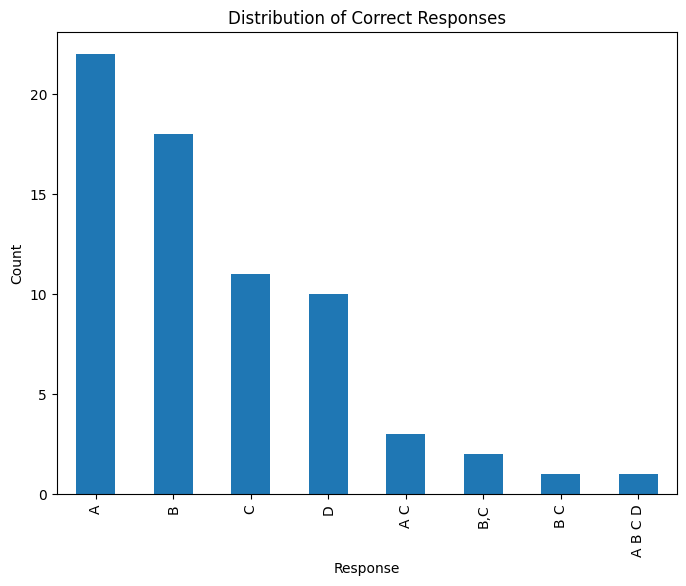

In [9]:
# Drop NaN values from the 'correct' column
df_cleaned = df.dropna(subset=['correct'])

# Count correct responses after dropping NaN values
correct_responses_cleaned = df_cleaned['correct'].value_counts()

# Plot
plt.figure(figsize=(8, 6))
correct_responses_cleaned.plot(kind='bar')
plt.title('Distribution of Correct Responses')
plt.xlabel('Response')
plt.ylabel('Count')
plt.show()

In [10]:
df.dtypes

question     object
subject      object
use          object
correct      object
responseA    object
responseB    object
responseC    object
responseD    object
remark       object
dtype: object

In [30]:
df.subject.unique()

array(['Databases', 'Distributed systems', 'Data Streaming', 'Docker',
       'Classification', 'data science', 'machine-learning', 'Automation'],
      dtype=object)

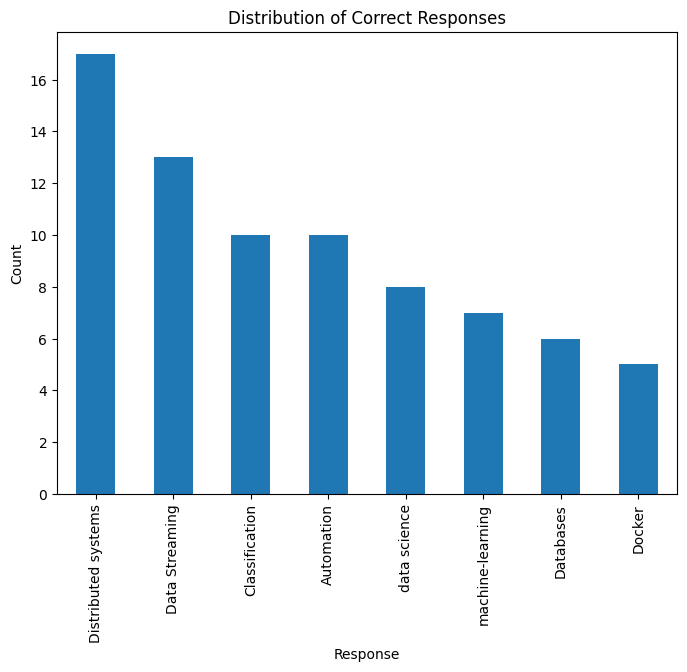

In [31]:
# Count correct responses
correct_responses = df['subject'].value_counts()

# Plot
plt.figure(figsize=(8, 6))
correct_responses.plot(kind='bar')
plt.title('Distribution of Correct Responses')
plt.xlabel('Response')
plt.ylabel('Count')
plt.show()

In [16]:
df.use.unique()

array(['Positioning test', 'Validation test', 'Total Boot Camp'],
      dtype=object)

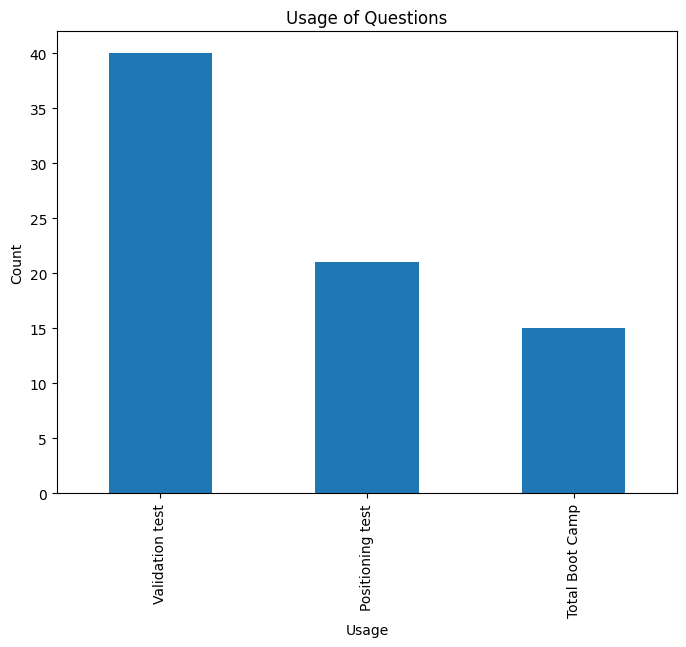

In [17]:
# Count usage of questions
usage_counts = df['use'].value_counts()

# Plot
plt.figure(figsize=(8, 6))
usage_counts.plot(kind='bar')
plt.title('Usage of Questions')
plt.xlabel('Usage')
plt.ylabel('Count')
plt.show()

In [22]:
df.remark.unique()

array(['Gut-feelings.'], dtype=object)

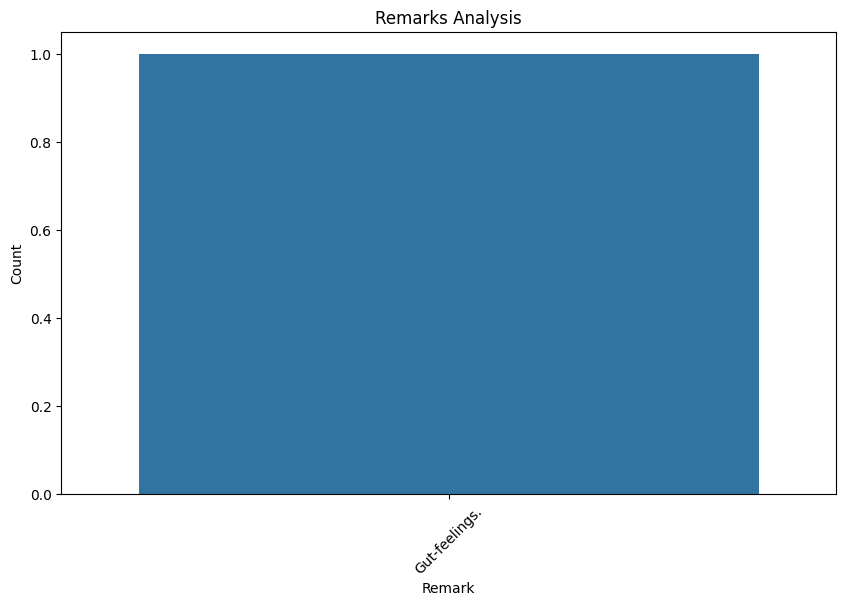

In [23]:
# Remove NaN remarks
df.dropna(subset=['remark'], inplace=True)

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(x='remark', data=df)
plt.title('Remarks Analysis')
plt.xlabel('Remark')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()